# TiTanic SurVivals

# - Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.preprocessing import Imputer


# -  Analysis Of DataSet

In [3]:
#Read CSV File / DataSet
df=pd.read_csv('titanic_data_set.csv')

In [4]:
#Describes all columns of DataSet
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [5]:
#Shows Top 5 Rows Of the DataSet
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Describes The No. Of Raws & Columns In DataSet
df.shape

(891, 12)

In [7]:
#Describe DataSet
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Describe DataSet
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
# To Check If There Is Any Missing Data.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# - RelaTionship BetWeen FeaTures And SurvIval


In [10]:
#Describes The Details Of SurVived PassEnger
survived=df[df['Survived']==1]
survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


In [11]:
#Describes The Details Of Passengers Who Not Survived
not_survived=df[df['Survived']==0]
not_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


In [12]:
print 'Survived ', survived.head(), '\n\nNot Survived ', not_survived.head()


Survived     PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN    

In [13]:
print "Survived: %i (%f%%)" %(len(survived),float(len(survived))/len(df)*100.0)
print "Not Survived: %i (%f%%)" %(len(not_survived),float(len(not_survived))/len(df)*100.0)
print "Total : %i" % len(df)


Survived: 342 (38.383838%)
Not Survived: 549 (61.616162%)
Total : 891


# - Pclass Vs Survival

In [14]:
#Value Counts Of Pclass
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
#Survival Grouped By Pclass
df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

# - Sex Vs Survival

In [16]:
#Value Counts Of Sex
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
#Survival Grouped By Sex
df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

# - [Pclass & Sex] Vs Survival

In [18]:
#Survival Grouped By Pclass & Sex
class_survival=df.groupby(['Pclass','Sex']).Survived.value_counts()
class_survival

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

#  - Survival Of Passengers According To Sex & Pclass

In [19]:
#Survival Of Class 1 Female Passenger
class1_female= class_survival[1,'female',1].astype('float32')/(class_survival[1,'female',1]+class_survival[1,'female',0]).astype('float32')
c1=class1_female*100
print "Female passenger survived from class 1 ::  %.2f" %(c1) + "%"

Female passenger survived from class 1 ::  96.81%


In [20]:
#Survival Of Class 1 Male Passenger
class1_male= class_survival[1,'male',1].astype('float32')/(class_survival[1,'male',1]+class_survival[1,'male',0]).astype('float32')
c1=class1_male*100
print "Male passenger survived from class 1 ::  %.2f" %(c1) + "%"

Male passenger survived from class 1 ::  36.89%


In [21]:
#Survival Of Class 2 Female Passenger
class2_female= class_survival[2,'female',1].astype('float32')/(class_survival[2,'female',1]+class_survival[2,'female',0]).astype('float32')
c2=class2_female*100
print "Female passenger survived from class 2 ::  %.2f" %(c2) + "%"

Female passenger survived from class 2 ::  92.11%


In [22]:
#Survival Of Class 2 Male Passenger
class2_male= class_survival[2,'male',1].astype('float32')/(class_survival[2,'male',1]+class_survival[2,'male',0]).astype('float32')
c2=class2_male*100
print "Male passenger survived from class 2 ::  %.2f" %(c2) + "%"

Male passenger survived from class 2 ::  15.74%


In [23]:
#Survival Of Class 3 Female Passenger
class3_female= class_survival[3,'female',1].astype('float32')/(class_survival[3,'female',1]+class_survival[3,'female',0]).astype('float32')
c3=class3_female*100
print "Female passenger survived from class 3 ::  %.2f" %(c3) + "%"

Female passenger survived from class 3 ::  50.00%


In [24]:
#Survival Of Class 3 Male Passenger
class3_male= class_survival[3,'male',1].astype('float32')/(class_survival[3,'male',1]+class_survival[3,'male',0]).astype('float32')
c3=class3_male*100
print "Male passenger survived from class 3 ::  %.2f" %(c3) + "%"

Male passenger survived from class 3 ::  13.54%


# - VisuAlising DataSet

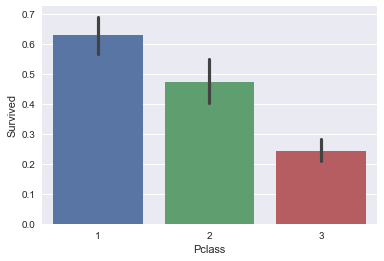

In [25]:
#Survival For Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
sns.despine()

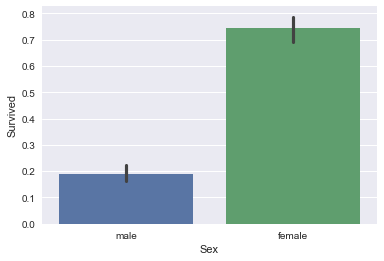

In [26]:
#Survival For Sex
sns.barplot(x='Sex', y='Survived', data=df)
sns.despine()


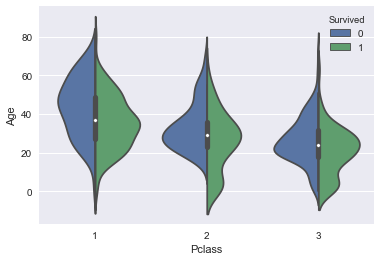

In [27]:
#Survival For Pclass & Age 
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)
sns.despine()

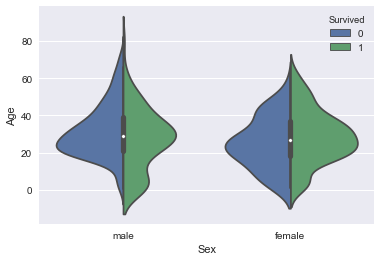

In [28]:
#Survival For Sex & Age
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)
sns.despine()

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
#To check missing values of features
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
age_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
age_imputer = age_imputer.fit(df.iloc[ : , [5]])
df.iloc[:, [5]] = age_imputer.transform(df.iloc[:, [5]])
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.Embarked.value_counts()



S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
df['Embarked'] = df['Embarked'].fillna('S')


In [34]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [35]:
#Encoding Sex
from sklearn.preprocessing import LabelEncoder
labelencoder_sex = LabelEncoder()
df.iloc[:, [4]] = labelencoder_sex.fit_transform(df.iloc[:, [4]])
df.head()  #Trivia : Why did we not use OneHotEncoder?


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [36]:
#Encoding Embarked
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_embarked = LabelEncoder()
df.iloc[:, [11]] = labelencoder_embarked.fit_transform(df.iloc[:, [11]])
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [37]:
df = pd.get_dummies(df, columns=['Pclass', 'Embarked'] )
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1


In [38]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0,2
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1,2
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1,1


In [39]:
irrelevant_features = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']


In [40]:
df = df.drop(irrelevant_features, axis=1)
df.head()



,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,0,1,22.0,7.2500,0,0,1,0,0,1,2
1,1,0,38.0,71.2833,1,0,0,1,0,0,2
2,1,0,26.0,7.9250,0,0,1,0,0,1,1
3,1,0,35.0,53.1000,1,0,0,0,0,1,2
4,0,1,35.0,8.0500,0,0,1,0,0,1,1


In [41]:
df.to_csv('titanic_prepared_data.csv', index=0)


In [42]:
df=pd.read_csv("titanic_prepared_data.csv")
df

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,0,1,22.000000,7.2500,0,0,1,0,0,1,2
1,1,0,38.000000,71.2833,1,0,0,1,0,0,2
2,1,0,26.000000,7.9250,0,0,1,0,0,1,1
3,1,0,35.000000,53.1000,1,0,0,0,0,1,2
4,0,1,35.000000,8.0500,0,0,1,0,0,1,1
5,0,1,29.699118,8.4583,0,0,1,0,1,0,1
6,0,1,54.000000,51.8625,1,0,0,0,0,1,1
7,0,1,2.000000,21.0750,0,0,1,0,0,1,5
8,1,0,27.000000,11.1333,0,0,1,0,0,1,3
9,1,0,14.000000,30.0708,0,1,0,1,0,0,2


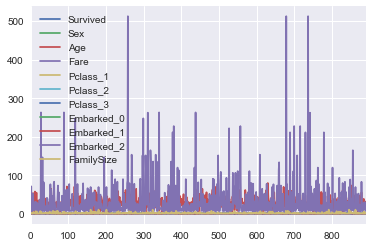

In [49]:
df.plot()

In [47]:
sns.plot( data=df)
sns.despine()

AttributeError: 'module' object has no attribute 'plot'